# AI Engineer Roadmap
## ML Fundamentals
### https://zazencodes.com/courses/ai-engineer-roadmap#ml-fundamentals

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Training data: square footage and bedrooms (input) and price (output)
X = np.array([[1200, 2], [1500, 3], [1800, 3], [2000, 4]])  # Square footage, bedrooms
y = np.array([240000, 300000, 360000, 400000])  # Prices

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict the price of a 1700 sqft house with 3 bedrooms
predicted_price = model.predict([[1700, 3]])
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $340,000.00


In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Training data: [email_length, contains_urgent, contains_money]
X = np.array([
    [100, 0, 0],  # Normal email
    [850, 1, 1],  # Spam email
    [300, 0, 0],  # Normal email
    [600, 1, 1],  # Spam email
    [400, 0, 0],  # Normal email
])
y = np.array(['normal', 'spam', 'normal', 'spam', 'normal'])  # Labels

# Create and train the model
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Predict if a new email is spam
new_email = [[500, 1, 1]]  # Length: 500, contains "urgent" and "money"
prediction = classifier.predict(new_email)
print(f"Email Classification: {prediction[0]}")


Email Classification: normal


In [1]:
from sklearn.cluster import KMeans
import numpy as np

# Customer data (standardized): [annual income, spending score, loyalty years]
data = np.array([
    [0.0, 0.42, 0.17], [0.13, 0.95, 0.67], [0.25, 0.0, 0.0], [0.38, 0.90, 0.50], [0.50, 0.43, 0.33],
    [0.63, 0.89, 0.83], [0.75, 0.05, 0.17], [0.88, 1.0, 1.0], [1.0, 0.37, 0.33]
])

# Create and train the model
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

# Assign clusters to customers
clusters = kmeans.labels_
print(f"Cluster assignments: {clusters}")

Cluster assignments: [0 1 0 1 0 1 0 1 0]


In [4]:
import random

# Define environment and rewards
actions = ["left", "right", "up", "down"]
rewards = {"left": -1, "right": 1, "up": 0, "down": -1}

# Simulate an agent taking random actions
for _ in range(5):  # Five moves
    action = random.choice(actions)
    reward = rewards[action]
    print(f"Action: {action}, Reward: {reward}")


Action: left, Reward: -1
Action: up, Reward: 0
Action: down, Reward: -1
Action: left, Reward: -1
Action: up, Reward: 0


In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Training data: [email_length, contains_urgent, contains_money]
X = np.array([
    [100, 0, 0],  # Normal email
    [850, 1, 1],  # Spam email
    [300, 0, 0],  # Normal email
    [600, 1, 1],  # Spam email
    [400, 0, 0],  # Normal email
])
y = np.array([0, 1, 0, 1, 0]) # Spam (1) or Not Spam (0)

# Train the model
model = LogisticRegression()
model.fit(X, y)

# Predict spam for a new email with feature values [500, 0, 0]
prediction = model.predict([[500, 0, 0]])
print("Spam" if prediction[0] == 1 else "Not Spam")


Not Spam


In [1]:
from xgboost import XGBClassifier
import numpy as np

# Training data: [transaction amount, number of transactions, time since last transaction]
X = np.array([[100, 10, 24], [200, 15, 48], [50, 5, 1], [300, 20, 72]])
y = np.array([0, 0, 1, 1])  # Fraudulent (1) or Legitimate (0)

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X, y)

# Predict fraud for a transaction with amount=150, transactions=12, time=36
prediction = model.predict([[150, 12, 36]])
print("Fraudulent" if prediction[0] == 1 else "Legitimate")


Legitimate


/Users/alex/pro/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:23:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [1]:
import pandas as pd

# Sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
       'Age': [25, None, 30, 22],
       'Salary': [50000, 60000, None, 52000]}
df = pd.DataFrame(data)

# Drop rows with missing values
df_cleaned = df.dropna()
print(df_cleaned)


    Name   Age   Salary
0  Alice  25.0  50000.0
3  David  22.0  52000.0


In [2]:
# Fill missing Age with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Salary with the median
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
print(df)


      Name        Age   Salary
0    Alice  25.000000  50000.0
1      Bob  25.666667  60000.0
2  Charlie  30.000000  52000.0
3    David  22.000000  52000.0


In [3]:
import numpy as np

# Sample data
data = [1, 2, 2, 3, 3, 4, 100, 2, 3, 4, 2, 1000]

# Calculate Z-scores
mean = np.mean(data)
std_dev = np.std(data)
z_scores = [(x - mean) / std_dev for x in data]

# Identify outliers with |Z-score| > 3
outliers = [x for x, z in zip(data, z_scores) if abs(z) > 3]
print(outliers)


[1000]


In [6]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return [x for x, z in zip(data, z_scores) if z < threshold]

# Cap outliers using percentiles (Winsorization)
def cap_outliers(data, lower_percentile=1, upper_percentile=99):
    lower = np.percentile(data, lower_percentile)
    upper = np.percentile(data, upper_percentile)
    return [min(max(x, lower), upper) for x in data]

# Replace with median for extreme values
def replace_with_median(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified = [median if abs((x - median) / mad) > threshold else x for x in data]
    return modified

# Apply different methods
cleaned_zscore = remove_outliers_zscore(data)
capped_data = cap_outliers(data)
median_replaced = replace_with_median(data)

print("Original data:              ", data)
print("After removing outliers:    ", cleaned_zscore)
print("After capping outliers:     ", capped_data)
print("After replacing with median:", median_replaced)


Original data:               [1, 2, 2, 3, 3, 4, 100, 2, 3, 4, 2, 1000]
After removing outliers:     [1, 2, 2, 3, 3, 4, 100, 2, 3, 4, 2]
After capping outliers:      [1.11, 2, 2, 3, 3, 4, 100, 2, 3, 4, 2, 901.0000000000005]
After replacing with median: [1, 2, 2, 3, 3, 4, 3.0, 2, 3, 4, 2, 3.0]


In [8]:
from sklearn.preprocessing import RobustScaler

# Sample data with outliers
data = np.array([1, 2, 3, 100, 2, 3, 1000]).reshape(-1, 1)

# Apply robust scaling
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(data)

# Apply log transformation (adding 1 to handle zeros)
log_data = np.log1p(data)

print("Original data:\n", data.ravel())
print()
print("Robust scaled:\n", scaled_data.ravel())
print()
print("Log transformed:\n", log_data.ravel())


Original data:
 [   1    2    3  100    2    3 1000]

Robust scaled:
 [-0.04040404 -0.02020202  0.          1.95959596 -0.02020202  0.
 20.14141414]

Log transformed:
 [0.69314718 1.09861229 1.38629436 4.61512052 1.09861229 1.38629436
 6.90875478]


In [9]:
from sklearn.preprocessing import MinMaxScaler

data = [[1], [2], [3], [4], [5]]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)


[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


In [10]:
from sklearn.preprocessing import StandardScaler

data = [[10], [20], [30], [40], [50]]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print(standardized_data)


[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [11]:
from sklearn.preprocessing import RobustScaler

data = [[1], [2], [3], [100]]  # Outlier included
scaler = RobustScaler()
robust_scaled_data = scaler.fit_transform(data)
print(robust_scaled_data)


[[-0.05882353]
 [-0.01960784]
 [ 0.01960784]
 [ 3.82352941]]


In [14]:
import re

# Sample text data
text_data = [" Hello World! ", "Hello@#$World", "hello   world", "HELLO WORLD"]

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Clean the text data
cleaned_text = [clean_text(text) for text in text_data]
print(cleaned_text)


['hello world', 'helloworld', 'hello world', 'hello world']


In [18]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')


def process_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back
    return ' '.join(tokens)

# Example usage
text = "This is a sample sentence with some common English words"
processed_text = process_text(text)
print(processed_text)


sample sentence common english words


[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/alex/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
import pandas as pd
import numpy as np

# Sample data with mixed number formats
data = {
    'values': ['1,234', '$5,000', '42.5%', 'N/A', '1.5M']
}
df = pd.DataFrame(data)

def parse_numbers(value):
    try:
        # Remove currency symbols and commas
        value = str(value).replace('$', '').replace(',', '')
        # Handle percentages
        if '%' in value:
            return float(value.replace('%', '')) / 100
        # Handle millions
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        # Convert to float
        return float(value)
    except:
        return np.nan

# Apply parsing
df['parsed_values'] = df['values'].apply(parse_numbers)
print(df)


   values  parsed_values
0   1,234       1234.000
1  $5,000       5000.000
2   42.5%          0.425
3     N/A            NaN
4    1.5M    1500000.000


In [20]:
from datetime import datetime
import pandas as pd

# Sample data with different date formats
dates = {
    'dates': [
        '2023-01-01',
        '01/15/2023',
        'Jan 20, 2023',
        '2023.02.01',
        '20230301'
    ]
}
df = pd.DataFrame(dates)

# Parse dates using pandas
df['parsed_dates'] = pd.to_datetime(df['dates'], format='mixed')

# Custom date parsing function for specific formats
def parse_custom_date(date_str):
    formats = [
        '%Y-%m-%d',
        '%m/%d/%Y',
        '%b %d, %Y',
        '%Y.%m.%d',
        '%Y%m%d'
    ]

    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

# Apply custom parsing
df['custom_parsed_dates'] = df['dates'].apply(parse_custom_date)
print(df)


          dates parsed_dates custom_parsed_dates
0    2023-01-01   2023-01-01          2023-01-01
1    01/15/2023   2023-01-15          2023-01-15
2  Jan 20, 2023   2023-01-20          2023-01-20
3    2023.02.01   2023-02-01          2023-02-01
4      20230301   2023-03-01          2023-03-01


In [21]:
 import pandas as pd

 # Sample DataFrame
 data = {'Height': [170, 165, 180], 'Weight': [70, 60, 80]}
 df = pd.DataFrame(data)

 # Create a new feature: BMI (Body Mass Index)
 df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
 print(df)


   Height  Weight        BMI
0     170      70  24.221453
1     165      60  22.038567
2     180      80  24.691358


In [22]:
df['Date'] = pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03'])
df['Day_of_Week'] = df['Date'].dt.day_name()
print(df)


   Height  Weight        BMI       Date Day_of_Week
0     170      70  24.221453 2024-01-01      Monday
1     165      60  22.038567 2024-01-02     Tuesday
2     180      80  24.691358 2024-01-03   Wednesday


In [23]:
df['Review'] = ['Great product!', 'Not bad', 'Terrible experience.']
df['Review_Length'] = df['Review'].apply(len)
print(df)


   Height  Weight        BMI       Date Day_of_Week                Review  \
0     170      70  24.221453 2024-01-01      Monday        Great product!   
1     165      60  22.038567 2024-01-02     Tuesday               Not bad   
2     180      80  24.691358 2024-01-03   Wednesday  Terrible experience.   

   Review_Length  
0             14  
1              7  
2             20  


In [25]:
# Random Forests provide feature importance scores based on how much
# each feature contributes to decreasing impurity across all trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load sample iris dataset
X, y = load_iris(return_X_y=True)

# Initialize and train the random forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance scores - higher scores mean more important features
print(model.feature_importances_)


[0.12609839 0.03224898 0.38591743 0.4557352 ]


In [26]:
# Recursive Feature Elimination (RFE) iteratively removes features
# by training the model multiple times and eliminating the weakest feature
# until the desired number of features is reached
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Create RFE selector that will select 2 best features
rfe = RFE(model, n_features_to_select=2)

# Fit RFE - this will iteratively eliminate features
rfe = rfe.fit(X, y)

# Print boolean mask of selected features (True = selected)
print(rfe.support_)


[False False  True  True]


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris

# Create a selector that will keep the 2 best features
# f_classif measures the relationship between each feature and the target variable
selector = SelectKBest(score_func=f_classif, k=2)

# Fit the selector and transform the data
X_selected = selector.fit_transform(X, y)

print("Original features shape:", X.shape)
print("Selected features shape:", X_selected.shape)
print("Feature scores:", selector.scores_)
print("Selected features:", selector.get_support())


Original features shape: (150, 4)
Selected features shape: (150, 2)
Feature scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
Selected features: [False False  True  True]


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca[:5])
print("Explained variance ratio:", pca.explained_variance_ratio_)


[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
Explained variance ratio: [0.92461872 0.05306648]


In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)
print(X_svd[:5])
print("Explained variance ratio:", svd.explained_variance_ratio_)


[[ 5.91274714 -2.30203322]
 [ 5.57248242 -1.97182599]
 [ 5.44697714 -2.09520636]
 [ 5.43645948 -1.87038151]
 [ 5.87564494 -2.32829018]]
Explained variance ratio: [0.52875361 0.44845576]


In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
print(X_tsne[:5])


[[-26.62385    -2.969567 ]
 [-29.334204   -2.056246 ]
 [-29.084578   -3.2681649]
 [-29.577831   -2.9022093]
 [-26.578043   -3.3951583]]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# First split: training (70%) vs test+eval (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: test (15%) and eval (15%) from the temp set
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Evaluation set size:", len(X_eval))


Training set size: 105
Testing set size: 22
Evaluation set size: 23


In [36]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9333333333333333
Accuracy: 0.9666666666666667
Accuracy: 0.9666666666666667


In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

# Perform stratified k-fold cross validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 1.0
Accuracy: 0.9666666666666667
Accuracy: 0.9333333333333333
Accuracy: 1.0
Accuracy: 0.9333333333333333


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize time series split
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

# Perform time series cross validation
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Fold {i+1}:")
    print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")
    print(f"MSE: {mean_squared_error(y_test, predictions)}\n")


Fold 1:
Training set size: 25, Test set size: 25
MSE: 0.0

Fold 2:
Training set size: 50, Test set size: 25
MSE: 1.0

Fold 3:
Training set size: 75, Test set size: 25
MSE: 0.018868056956335345

Fold 4:
Training set size: 100, Test set size: 25
MSE: 0.3483620695449156

Fold 5:
Training set size: 125, Test set size: 25
MSE: 0.12217397712069693



In [41]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

# Generate a binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

print("Training Logistic Regression with Manual K-Fold Cross-Validation")

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    # Split data into training and testing sets for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Initialize and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold {fold} Accuracy: {accuracy:.3f}")

# Final results
print(f"\nCross-Validation Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.3f}")


Training Logistic Regression with Manual K-Fold Cross-Validation
Fold 1 Accuracy: 0.820
Fold 2 Accuracy: 0.860
Fold 3 Accuracy: 0.810
Fold 4 Accuracy: 0.870
Fold 5 Accuracy: 0.830

Cross-Validation Accuracies: [0.82, 0.86, 0.81, 0.87, 0.83]
Mean Accuracy: 0.838


In [42]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel='linear', C=1.0))  # Linear Support Vector Machine
])

# Perform cross-validation
print("\nTraining Support Vector Machine (SVM) with Feature Scaling")
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Results
print(f"Cross-Validation Accuracies: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.3f}")



Training Support Vector Machine (SVM) with Feature Scaling
Cross-Validation Accuracies: [0.84 0.87 0.82 0.81 0.85]
Mean Accuracy: 0.838


In [43]:
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline with polynomial features and XGBoost
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Add polynomial features
    ('scaler', StandardScaler()),  # Standardize features
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost Classifier
])

# Perform cross-validation
print("\nTraining XGBoost with Polynomial Features")
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Results
print(f"Cross-Validation Accuracies: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.3f}")



Training XGBoost with Polynomial Features


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:44] WARNING: /U

Cross-Validation Accuracies: [0.9  0.92 0.89 0.88 0.91]
Mean Accuracy: 0.900


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example predictions and labels
y_true = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]


# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")    # Proportion of correctly classified samples
print(f"Precision: {precision:.2f}")  # Fraction of true positives among predicted positives
print(f"Recall: {recall:.2f}")        # Fraction of true positives among actual positives
print(f"F1 Score: {f1:.2f}")          # Harmonic mean of precision and recall


Accuracy: 0.61
Precision: 0.58
Recall: 0.64
F1 Score: 0.61


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example predictions and labels
y_true = [3.0, -0.5, 2.0, 7.0, 1.5, 4.2, -2.1, 8.9, 3.3, 5.7, 2.8, -1.4, 6.1, 0.8, 4.5]
y_pred = [2.5, 0.0, 2.0, 8.0, 1.8, 3.9, -1.8, 9.2, 3.0, 5.2, 3.1, -1.0, 5.8, 1.2, 4.8]

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.2f}")      # Average squared difference between predicted and actual values
print(f"MAE: {mae:.2f}")      # Average absolute difference between predicted and actual values
print(f"R-squared: {r2:.2f}") # Proportion of variance explained by the model


MSE: 0.19
MAE: 0.38
R-squared: 0.98


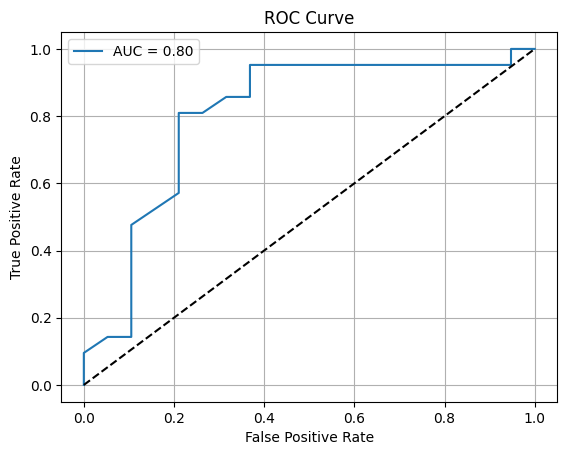

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example predictions
y_true = [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0]
y_scores = [0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.3, 0.9, 0.15, 0.25, 0.65, 0.75, 0.1, 0.85, 0.2, 0.95, 0.3, 0.6, 0.8, 0.1, 0.67, 0.63, 0.54, 0.0, 0.27, 0.41, 0.67, 0.87, 0.66, 0.98, 0.32, 0.41, 0.02, 0.95, 0.7, 0.81, 0.96, 0.92, 0.27, 0.43]


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

# Plot
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


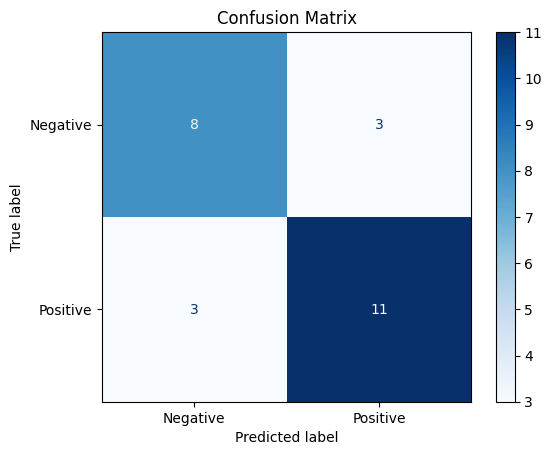

True Negatives: 8
False Positives: 3
False Negatives: 3
True Positives: 11


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example predictions and labels
y_true = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Negative', 'Positive'])

# Plot with customization
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Print additional metrics
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")   # Correctly predicted negative cases
print(f"False Positives: {fp}")  # Incorrectly predicted as positive when actually negative
print(f"False Negatives: {fn}")  # Incorrectly predicted as negative when actually positive
print(f"True Positives: {tp}")   # Correctly predicted positive cases


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Define model and hyperparameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [3, 5, 8]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 100}
Best Score: 0.9733333333333333


In [54]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Example dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Objective function that Optuna will optimize
def objective(trial):

    # Define hyperparameter search spaces (i.e. between 10-200, 5-30, 2-10)
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Create Random Forest model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )

    # Perform cross validation and return mean accuracy score
    # cv=3 means 3-fold cross validation
    score = cross_val_score(model, X, y, cv=3, scoring='accuracy').mean()
    return score

# Create an Optuna study object that maximizes the objective
study = optuna.create_study(direction='maximize')

# Run optimization for 20 trials
study.optimize(objective, n_trials=20)

print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-27 08:12:03,453] A new study created in memory with name: no-name-a71fcaf9-52ba-43a4-8313-72467436f367
[I 2025-02-27 08:12:03,498] Trial 0 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 26, 'max_depth': 29, 'min_samples_split': 2}. Best is trial 0 with value: 0.9466666666666667.
[I 2025-02-27 08:12:03,560] Trial 1 finished with value: 0.96 and parameters: {'n_estimators': 39, 'max_depth': 19, 'min_samples_split': 6}. Best is trial 1 with value: 0.96.
[I 2025-02-27 08:12:03,717] Trial 2 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 107, 'max_depth': 16, 'min_samples_split': 4}. Best is trial 1 with value: 0.96.
[I 2025-02-27 08:12:03,7

Best Parameters: {'n_estimators': 34, 'max_depth': 9, 'min_samples_split': 9}
Best Score: 0.9666666666666667


In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

RANDOM_STATE=42

# 1. Generate a synthetic classification dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=RANDOM_STATE)

# 2. Split into CV and eval sets (this would have been done earlier, such that eval set has not yet been used)
X_cv, X_eval, y_cv, y_eval = train_test_split(X, y, test_size=0.15, random_state=RANDOM_STATE)

print("Training shape:", X_cv.shape, y_cv.shape)
print("Eval shape:", X_eval.shape, y_eval.shape)

# 3. Define three different models with chosen hyperparameters
# These hyperparameters are hypothetical "good" choices based on prior tuning on the CV data.

model_logreg = LogisticRegression(C=0.5, solver='liblinear', random_state=RANDOM_STATE)
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE)
model_gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=RANDOM_STATE)

# 4. Train each model on the CV set
model_logreg.fit(X_cv, y_cv)
model_rf.fit(X_cv, y_cv)
model_gb.fit(X_cv, y_cv)

# 5. Evaluate on the eval set
logreg_preds = model_logreg.predict(X_eval)
rf_preds = model_rf.predict(X_eval)
gb_preds = model_gb.predict(X_eval)

# Choose a metric: let's use accuracy and also look at F1 score for more insight
logreg_accuracy = accuracy_score(y_eval, logreg_preds)
rf_accuracy = accuracy_score(y_eval, rf_preds)
gb_accuracy = accuracy_score(y_eval, gb_preds)

logreg_f1 = f1_score(y_eval, logreg_preds)
rf_f1 = f1_score(y_eval, rf_preds)
gb_f1 = f1_score(y_eval, gb_preds)

# Print results
print("Logistic Regression: Accuracy = {:.4f}, F1 = {:.4f}".format(logreg_accuracy, logreg_f1))
print("Random Forest:       Accuracy = {:.4f}, F1 = {:.4f}".format(rf_accuracy, rf_f1))
print("Gradient Boosting:   Accuracy = {:.4f}, F1 = {:.4f}".format(gb_accuracy, gb_f1))

# 6. Select the best model based on the evaluation set results
# Let's prioritize F1 score (just as an example); we could choose accuracy or a combination of metrics.
models = {
    "Logistic Regression": (logreg_accuracy, logreg_f1),
    "Random Forest": (rf_accuracy, rf_f1),
    "Gradient Boosting": (gb_accuracy, gb_f1)
}

best_model = None
best_f1 = -1
for name, (acc, f1) in models.items():
    if f1 > best_f1:
        best_f1 = f1
        best_model = name

print("\nThe best model based on the eval set is: {} with F1 = {:.4f}".format(best_model, best_f1))


Training shape: (1700, 20) (1700,)
Eval shape: (300, 20) (300,)
Logistic Regression: Accuracy = 0.9067, F1 = 0.9041
Random Forest:       Accuracy = 0.9267, F1 = 0.9262
Gradient Boosting:   Accuracy = 0.9533, F1 = 0.9514

The best model based on the eval set is: Gradient Boosting with F1 = 0.9514


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Load binary classification dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Create pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=2))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Get predictions and probabilities
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

# Calculate accuracy
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


Accuracy: 0.93
AUC: 0.95


In [59]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess data
digits = load_digits()
X = digits.data.astype('float32') / 16.0  # Normalize data
y = tf.keras.utils.to_categorical(digits.target, 10)  # One-hot encode labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.3f}')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Sample prediction classes:")
for i in range(15):
    print(f"Prediction: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}")


Epoch 1/50


/Users/alex/pro/zazencodes-courses/ai-engineer-roadmap/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1682 - loss: 2.2537 - val_accuracy: 0.6429 - val_loss: 1.8672
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.7558 - val_accuracy: 0.8135 - val_loss: 1.1754
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 1.1537 - val_accuracy: 0.8492 - val_loss: 0.6781
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8122 - loss: 0.6883 - val_accuracy: 0.8929 - val_loss: 0.4659
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8574 - loss: 0.5049 - val_accuracy: 0.9087 - val_loss: 0.3676
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.3974 - val_accuracy: 0.9246 - val_loss: 0.2935
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8955 - loss: 0.3478 - val_accuracy: 0.9087 - val_loss: 0.2755
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9283 - loss: 0.3010 - val_accuracy: 0.9286 - val_loss: 0.2362
Epo

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess data
digits = load_digits()
X = digits.data.astype('float32') / 16.0
y = digits.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors and create datasets
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

# Split training data for validation (20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create dataloaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the model
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10)
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training function
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    return running_loss/len(loader), correct/total

# Evaluation function
def evaluate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    return running_loss/len(loader), correct/total

# Training loop
for epoch in range(50):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    if epoch % 5 == 0 or epoch == 49:  # Print only every 5 epochs to reduce verbosity
        print(f'Epoch {epoch+1}/50, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# Test the model
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f'Test accuracy: {test_acc:.3f}')

# Make predictions on test data
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Print sample predictions
print("Sample prediction classes:")
for i in range(15):
    print(f"Prediction: {predictions[i]}, Actual: {true_labels[i]}")

Epoch 1/50, Train Loss: 2.2110, Train Acc: 0.2876, Val Loss: 2.0519, Val Acc: 0.5079
Epoch 6/50, Train Loss: 0.4684, Train Acc: 0.8726, Val Loss: 0.4079, Val Acc: 0.9008
Epoch 11/50, Train Loss: 0.2408, Train Acc: 0.9284, Val Loss: 0.2429, Val Acc: 0.9444
Epoch 16/50, Train Loss: 0.1555, Train Acc: 0.9602, Val Loss: 0.2006, Val Acc: 0.9325
Epoch 21/50, Train Loss: 0.1237, Train Acc: 0.9632, Val Loss: 0.1611, Val Acc: 0.9524
Epoch 26/50, Train Loss: 0.0977, Train Acc: 0.9721, Val Loss: 0.1425, Val Acc: 0.9484
Epoch 31/50, Train Loss: 0.0837, Train Acc: 0.9692, Val Loss: 0.1255, Val Acc: 0.9603
Epoch 36/50, Train Loss: 0.0597, Train Acc: 0.9821, Val Loss: 0.1124, Val Acc: 0.9643
Epoch 41/50, Train Loss: 0.0480, Train Acc: 0.9881, Val Loss: 0.1341, Val Acc: 0.9563
Epoch 46/50, Train Loss: 0.0397, Train Acc: 0.9891, Val Loss: 0.1160, Val Acc: 0.9643
Epoch 50/50, Train Loss: 0.0339, Train Acc: 0.9920, Val Loss: 0.1333, Val Acc: 0.9484
Test accuracy: 0.967
Sample prediction classes:
Predicti

In [3]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

# Start an MLflow experiment
with mlflow.start_run():
    # Train a model
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train, y_train)

    # Log metrics and model
    accuracy = clf.score(X_test, y_test)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(clf, "model")

    print(f"Model logged with accuracy: {accuracy:.2f}")


2025/02/27 10:00:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with accuracy: 0.91


In [ ]:
import wandb
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize a W&B run
wandb.init(project="mlops-example")

# Define a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.softmax(self.fc2(x), dim=1)

model = SimpleModel()

# Log hyperparameters
config = {"learning_rate": 0.001, "epochs": 5}
wandb.config.update(config)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: